In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Y dataset')

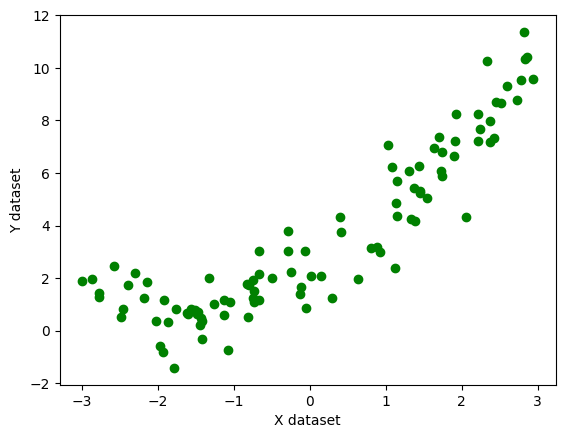

In [6]:
X = 6* np.random.rand(100,1) -3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100,1)
# quadratic equation used y = 0.5x^2 + 1.5x + 2 + outliers
plt.scatter(X,y, color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [10]:
# implement a simple linear regression
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [11]:
regression_1.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [12]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regression_1.predict(X_test))
print(score)

0.7353120277126264


Text(0, 0.5, 'Y dataset')

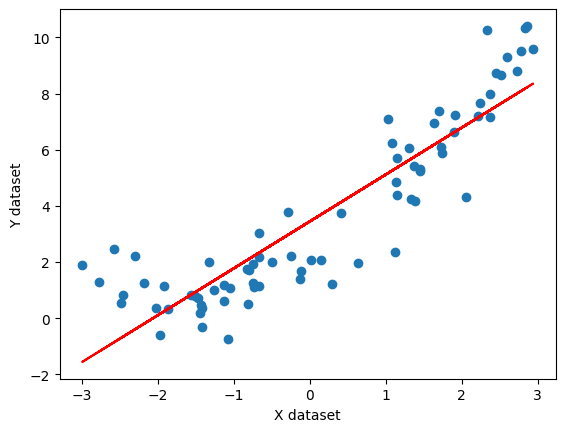

In [13]:
# visualize this model
plt.plot(X_train, regression_1.predict(X_train), color='r')
plt.scatter(X_train, y_train)
plt.xlabel("X dataset")
plt.ylabel("Y dataset")

In [15]:
# now solve this problem with the help of polynomial regression
# lets apply polynomial transfomation

from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [16]:
X_train_poly


array([[ 1.00000000e+00, -2.29404693e+00,  5.26265132e+00],
       [ 1.00000000e+00,  1.44710132e+00,  2.09410222e+00],
       [ 1.00000000e+00,  2.98933077e-01,  8.93609844e-02],
       [ 1.00000000e+00,  1.30986245e+00,  1.71573965e+00],
       [ 1.00000000e+00, -6.71878464e-01,  4.51420671e-01],
       [ 1.00000000e+00,  1.37929236e+00,  1.90244743e+00],
       [ 1.00000000e+00,  1.47037122e-01,  2.16199151e-02],
       [ 1.00000000e+00, -1.46508935e+00,  2.14648680e+00],
       [ 1.00000000e+00, -2.02061703e+00,  4.08289320e+00],
       [ 1.00000000e+00,  4.04738710e-01,  1.63813424e-01],
       [ 1.00000000e+00,  1.03440258e+00,  1.06998871e+00],
       [ 1.00000000e+00, -1.96503874e+00,  3.86137726e+00],
       [ 1.00000000e+00,  1.14325274e+00,  1.30702683e+00],
       [ 1.00000000e+00,  2.86171570e+00,  8.18941677e+00],
       [ 1.00000000e+00, -1.12806367e+00,  1.27252764e+00],
       [ 1.00000000e+00, -1.21663231e-01,  1.48019417e-02],
       [ 1.00000000e+00, -7.31734437e-01

In [17]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred= regression.predict(X_test_poly)
score= r2_score(y_test, y_pred)
print(score)

0.8939450460245528


In [18]:
print(regression.coef_)

[[0.         1.53126137 0.41172656]]


In [19]:
print(regression.intercept_)

[2.27550411]


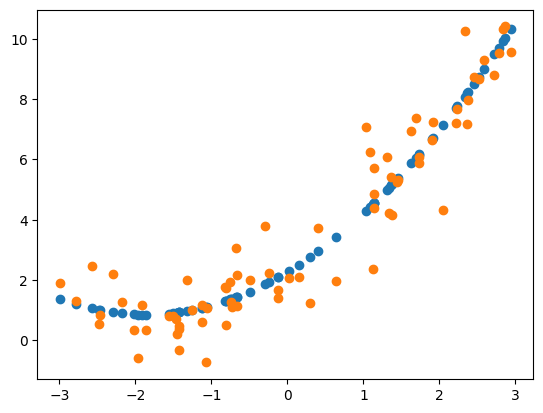

In [21]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [23]:
X_train_poly

array([[ 1.00000000e+00, -2.29404693e+00,  5.26265132e+00,
        -1.20727691e+01],
       [ 1.00000000e+00,  1.44710132e+00,  2.09410222e+00,
         3.03037808e+00],
       [ 1.00000000e+00,  2.98933077e-01,  8.93609844e-02,
         2.67129540e-02],
       [ 1.00000000e+00,  1.30986245e+00,  1.71573965e+00,
         2.24738294e+00],
       [ 1.00000000e+00, -6.71878464e-01,  4.51420671e-01,
        -3.03299827e-01],
       [ 1.00000000e+00,  1.37929236e+00,  1.90244743e+00,
         2.62403121e+00],
       [ 1.00000000e+00,  1.47037122e-01,  2.16199151e-02,
         3.17893009e-03],
       [ 1.00000000e+00, -1.46508935e+00,  2.14648680e+00,
        -3.14479494e+00],
       [ 1.00000000e+00, -2.02061703e+00,  4.08289320e+00,
        -8.24996356e+00],
       [ 1.00000000e+00,  4.04738710e-01,  1.63813424e-01,
         6.63016338e-02],
       [ 1.00000000e+00,  1.03440258e+00,  1.06998871e+00,
         1.10679908e+00],
       [ 1.00000000e+00, -1.96503874e+00,  3.86137726e+00,
      

In [25]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred= regression.predict(X_test_poly)
score= r2_score(y_test, y_pred)
print(score)

0.89599523458609


pipelining concept


In [26]:
from sklearn.pipeline import Pipeline

In [27]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()
    

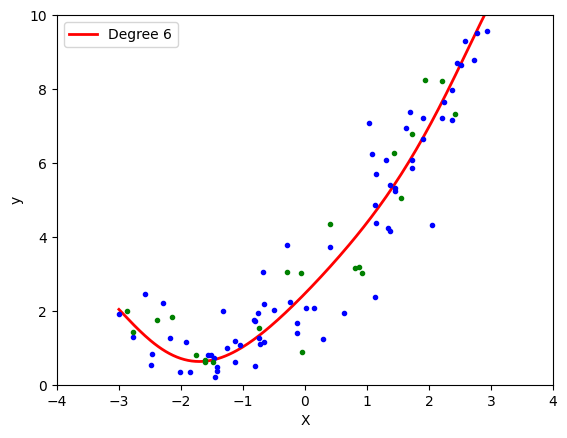

In [28]:

poly_regression(6)